In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import scipy.stats as stats
#change

In [2]:
train = np.load('fashion_train.npy')   
test = np.load('fashion_test.npy')   

### Desciption of data
- T-shirt/top = 0
- Trouser = 1
- Pullover = 2
- Dress = 3
- Shirt = 4

In [24]:
T_shirt_top = []
Trouser = []
Pullover = []
Dress = []
Shirt = []
y = []
train_witout_y = []

In [25]:
for i in range(len(train)):
    if train[i][-1] == 0:
        T_shirt_top.append(train[i][:len(train[i])-1])
    if train[i][-1] == 1:
        Trouser.append(train[i][:len(train[i])-1])
    if train[i][-1] == 2:
        Pullover.append(train[i][:len(train[i])-1])
    if train[i][-1] == 3:
        Dress.append(train[i][:len(train[i])-1])
    if train[i][-1] == 4:
        Shirt.append(train[i][:len(train[i])-1])
    y.append(train[i][-1])
    train_witout_y.append(train[i][:len(train[i])-1])


T_shirt_top = np.array(T_shirt_top)
Trouser = np.array(Trouser)
Pullover = np.array(Pullover)
Dress = np.array(Dress)
Shirt = np.array(Shirt)
y = np.array(y)
train_witout_y = np.array(train_witout_y)

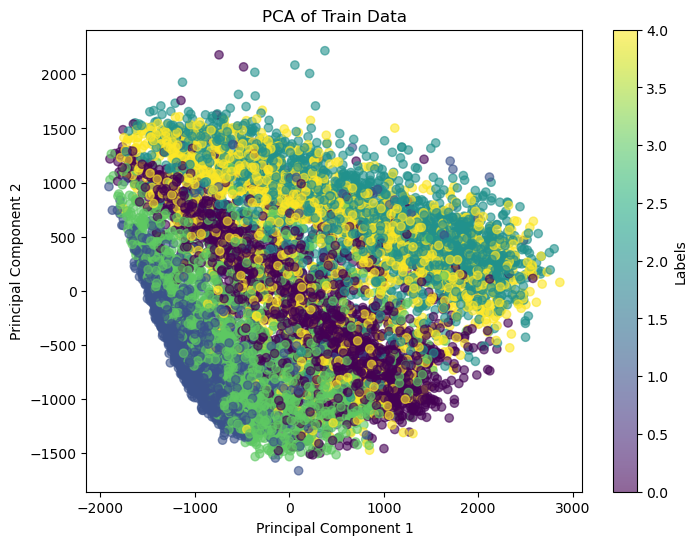

In [34]:
# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
train_reduced = pca.fit_transform(train_witout_y)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.colorbar(label='Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Train Data')
plt.show()


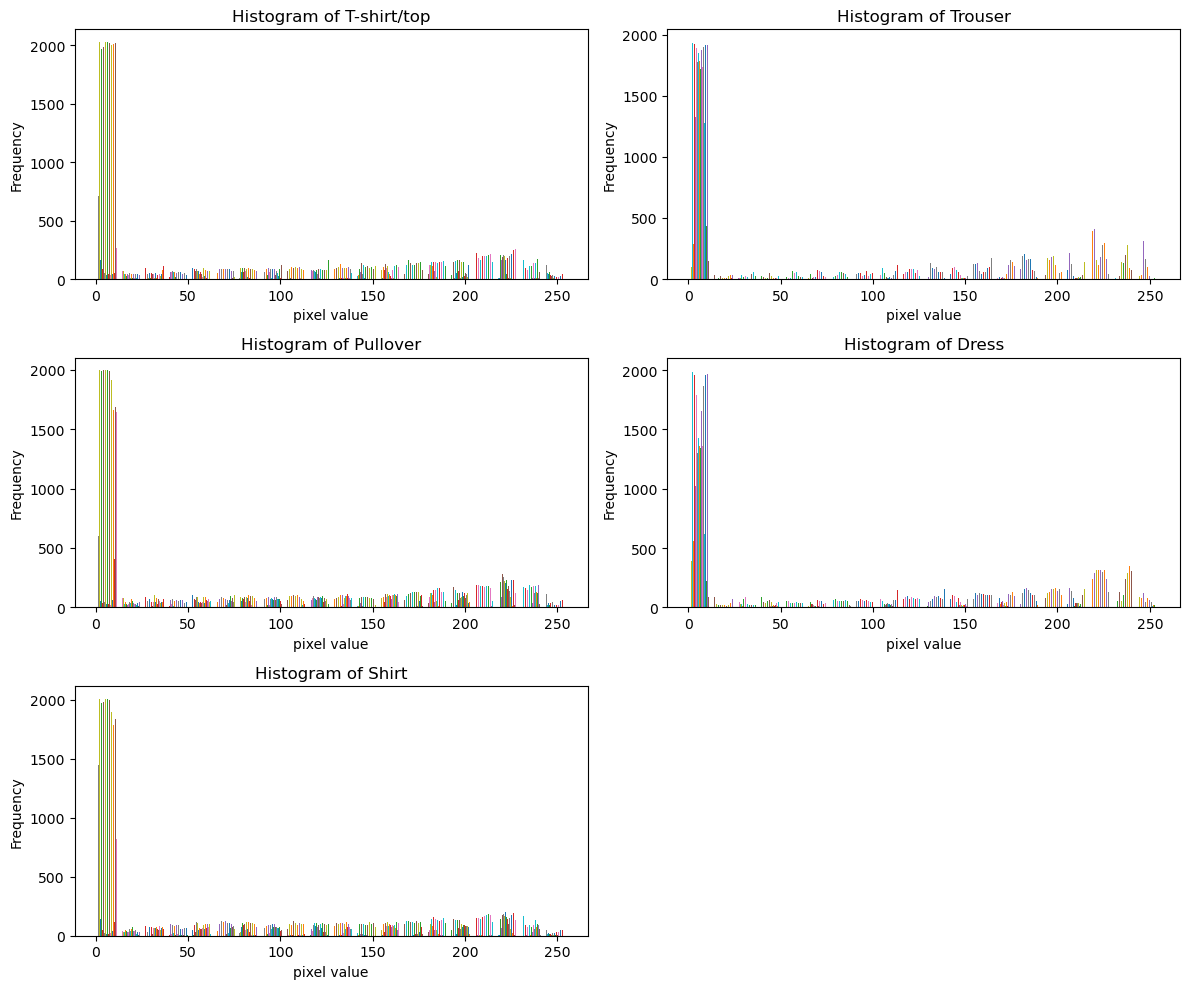

In [66]:
list_of_classes = [T_shirt_top, Trouser, Pullover, Dress, Shirt]
name_of_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
fig, ax = plt.subplots(3, 2, figsize=(12, 10))

ax[0, 0].hist(list_of_classes[0], bins = 20)
ax[0, 0].set_title('Histogram of ' + name_of_classes[0])
ax[0, 0].set_xlabel('pixel value')
ax[0, 0].set_ylabel('Frequency')

ax[0, 1].hist(list_of_classes[1], bins = 20)
ax[0, 1].set_title('Histogram of ' + name_of_classes[1])
ax[0, 1].set_xlabel('pixel value')
ax[0, 1].set_ylabel('Frequency')

ax[1, 0].hist(list_of_classes[2], bins = 20)
ax[1, 0].set_title('Histogram of ' + name_of_classes[2])
ax[1, 0].set_xlabel('pixel value')
ax[1, 0].set_ylabel('Frequency')

ax[1, 1].hist(list_of_classes[3], bins = 20)
ax[1, 1].set_title('Histogram of ' + name_of_classes[3])
ax[1, 1].set_xlabel('pixel value')
ax[1, 1].set_ylabel('Frequency')

ax[2, 0].hist(list_of_classes[4], bins = 20)
ax[2, 0].set_title('Histogram of ' + name_of_classes[4])
ax[2, 0].set_xlabel('pixel value')
ax[2, 0].set_ylabel('Frequency')

fig.delaxes(ax[2, 1])

plt.tight_layout()
plt.show()

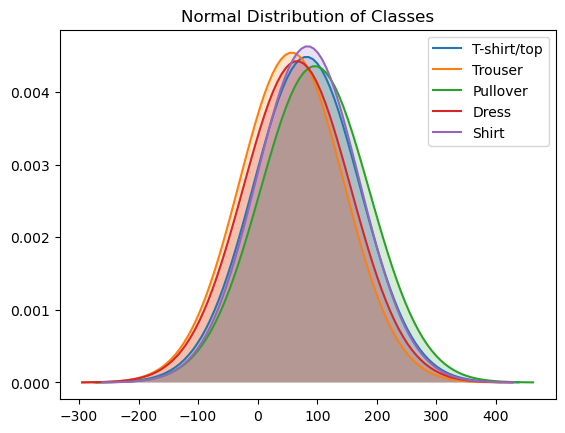

In [81]:
mean = [T_shirt_top.mean(), Trouser.mean(), Pullover.mean(), Dress.mean(), Shirt.mean()]
std = [T_shirt_top.std(), Trouser.std(), Pullover.std(), Dress.std(), Shirt.std()]
name_of_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
handles = []

for i in range(len(mean)):
    x = np.linspace(mean[i] - 4*std[i], mean[i] + 4*std[i], 100)
    
    y = stats.norm.pdf(x, mean[i], std[i])

    handle, = plt.plot(x, y, label=name_of_classes[i])
    plt.fill_between(x, y, alpha=0.2)

    handles.append(handle)

plt.legend(handles, name_of_classes)
plt.title('Normal Distribution of Classes')

plt.show()
